<a href="https://colab.research.google.com/github/madhumaram/microservicesfirstproject/blob/master/k_means_mit_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modify the code cell below to generate 300 samples and set the number of centers to 3.

In [1]:
from sklearn.datasets import make_blobs

In [3]:
features, true_labels = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

Here’s a look at the first five elements for each of the variables returned by make_blobs() :

In [4]:
features[:5]

array([[ 0.42857674,  4.9739971 ],
       [ 1.61990909,  0.06764529],
       [ 1.43289271,  4.37679234],
       [-1.57846247,  3.03445802],
       [-1.65862863,  2.26746029]])

In [5]:
true_labels[:5]

array([0, 1, 0, 2, 2])

In the code cell below, we import the plotting library matplotlib to visualize the points we've created
above in a scatter plot.

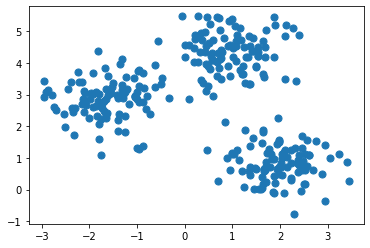

In [6]:
import matplotlib.pyplot as plt

plt.scatter(features[:, 0], features[:, 1], s=50);

In this example, you’ll use the StandardScaler class from sklearn . This class implements a type of
feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature
in your dataset so that the features have a mean of 0 and standard deviation of 1.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

Run the code cell below to take a look at how the values have been scaled in scaled_features:

In [9]:
scaled_features[:5]

array([[-0.00288843,  1.46120589],
       [ 0.73445459, -1.67573046],
       [ 0.61870585,  1.07937569],
       [-1.2450912 ,  0.22113774],
       [-1.29470788, -0.26925169]])

We can also plot the scaled data to see if it looks similar to our original feature data but which is now shifted
and scaled (note the different axes):

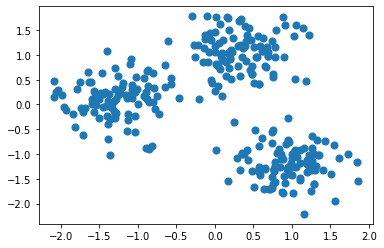

In [10]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], s=50);

In the code cell below, instantiate the KMeans class with the following arguments: init equal to
"random" , n_clusters equal to 4 , and random_state equal to 42 .

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans( init="random", n_clusters=4,random_state=42)

Now that the k-means class is ready, the next step is to fit it and predict the data in scaled_features

In [13]:
kmeans.fit(scaled_features)

y_kmeans = kmeans.predict(scaled_features)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as
determined by the k-means estimator:

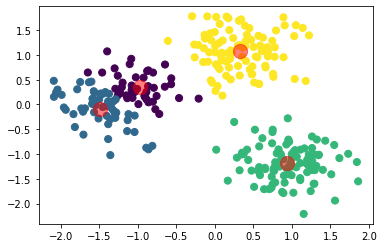

In [14]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans,

s=50, cmap='viridis')
#getting the coordinates of the centers
centers = kmeans.cluster_centers_
#plotting the centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

In the code cell below, we compute the SSE for a various number of clusters between 1 and 10.

In [16]:
kmeans_kwargs = {"init": "random", "random_state": 42}

# A list holds the SSE values for each k
sse = []
  #computing the SSE for different numbers of clusters
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)#getting the SSE

Finally, in the code cell below, we plot the elbow curve.

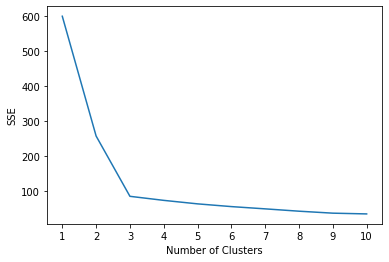

In [17]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()